In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [4]:
help(gp2.KUNet)

Help on class KUNet in module gp2.gp2.classifiers.k_unet:

class KUNet(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KUNet(input_shape=(512, 512, 1), num_classes=1, activation='relu', use_batch_norm=True, upsample_mode='deconv', dropout=0.3, dropout_change_per_layer=0.0, dropout_type='spatial', use_dropout_on_upsampling=False, use_attention=False, filters=16, num_layers=4, output_activation='sigmoid', name='kunet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Method resolution order:
 |      KUNet
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_shape=(512, 512, 1), num_classes=1, activation='relu', use_batch_norm=True, upsample_mode='deconv', dropout=0.3, dropout_change_per_layer=0.0, dropout_type='spatial', 

In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmp_5zl87f2GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

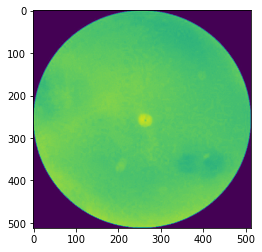

In [5]:
imshow(images[0])

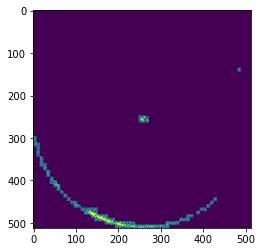

In [6]:
imshow(masks[0])

In [7]:
images = images[:6392]

In [8]:
masks = masks[:6392]

In [9]:
images.shape

(6392, 512, 512, 1)

In [10]:
masks.shape

(6392, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 24s 3s/step - loss: 0.7255 - dice_coeff: 0.4223 - val_loss: 0.6901 - val_dice_coeff: 0.2071
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.6613 - dice_coeff: 0.4605 - val_loss: 0.7071 - val_dice_coeff: 0.2345
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.6218 - dice_coeff: 0.4838 - val_loss: 0.7263 - val_dice_coeff: 0.2572
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.5990 - dice_coeff: 0.5009 - val_loss: 0.7442 - val_dice_coeff: 0.2736
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.5647 - dice_coeff: 0.5242 - val_loss: 0.7589 - val_dice_coeff: 0.2859
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.5483 - dice_coeff: 0.5343 - val_loss: 0.7700 - val_dice_coeff: 0.2960
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.5323 - dice_coeff: 0.5473 - val_loss: 0.7784 - va

In [13]:
R.classifier_scores

[[0.6207031607627869, 0.42822712659835815],
 [0.33298924565315247, 0.4666077792644501],
 [0.303912878036499, 0.5075504183769226],
 [0.2879621684551239, 0.4861898720264435],
 [0.2657361924648285, 0.572465717792511],
 [0.26763156056404114, 0.5696004033088684],
 [0.25579699873924255, 0.5684928894042969]]

In [14]:
R.discriminator_scores

[[0.0020990087650716305, 1.0],
 [0.003093445673584938, 1.0],
 [0.0023892137687653303, 1.0],
 [0.0019861035980284214, 1.0],
 [0.0027526284102350473, 1.0],
 [0.0029263626784086227, 1.0],
 [0.0029813782311975956, 1.0]]

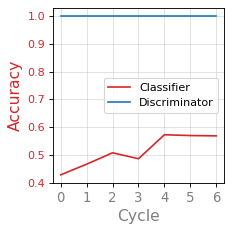

In [15]:
R.plot() //This when I run for the second time

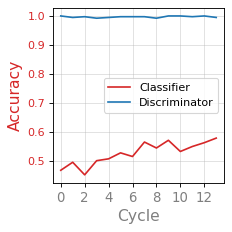

In [20]:
R.plot() //This is when I run for the first time